# Linear Discriminant Analysis (LDA)

## Importing the libraries

In [1]:
# 12/01/2024
# IDE: VSC
# Section 40: Linear Discriminant Analysis (LDA)
# Video [369, 370]
# Comments origin: logistic_regression

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Wine.csv')

# [rows, columns]
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# we can scale the whole matrix
# fit_transform for all the variables that are not dummy variables in X_train
# fit: will get the mean and standard deviation of each feature
# transform: applies the standardization formula so that all values can be in the same scale
X_train = sc.fit_transform(X_train)

# The features of the test set need to be scaled by the same scaler that was used on the training set
# You use transform on the test set without re-fitting the scaler. Reusing the parameters learned 
# from the training set helps maintain the same scale and prevents introducing information from the
# test set into the training process. (Prevents information leakage)
X_test = sc.transform(X_test)

## Applying LDA

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# 2 dimensions (better to start with 2)
lda = LDA(n_components = 2)

# we can scale the whole matrix
# fit_transform for all the variables that are not dummy variables in X_train
# fit: will get the mean and standard deviation of each feature
# transform: applies the standardization formula so that all values can be in the same scale
# LDA in the fit_transform also needs the independent variable y_train:
X_train = lda.fit_transform(X_train, y_train)

# The features of the test set need to be scaled by the same scaler that was used on the training set
# You use transform on the test set without re-fitting the scaler. Reusing the parameters learned 
# from the training set helps maintain the same scale and prevents introducing information from the
# test set into the training process. (Prevents information leakage)
X_test = lda.transform(X_test)

## Training the Logistic Regression model on the Training set

In [6]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Making the Confusion Matrix

In [7]:
# scikit-learn metrics module
from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix
'''
                        Actual value: True   Actual value: False
Predicted value: True   True (TT)            False (FT)
Predicted value: False  False (TF)           True (FF)
'''

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
# correct predictions of the class 1: 14 
# correct predictions of the class 2: 16
# correct predictions of the class 3: 6 
# accuracy score = 14+16+6 / 14+16+6 = 36/36

accuracy_score(y_test, y_pred)
# perfect accuracy score = 1.0 
# (but we didn't make up the dataset to obtain it)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

## Visualising the Training set results

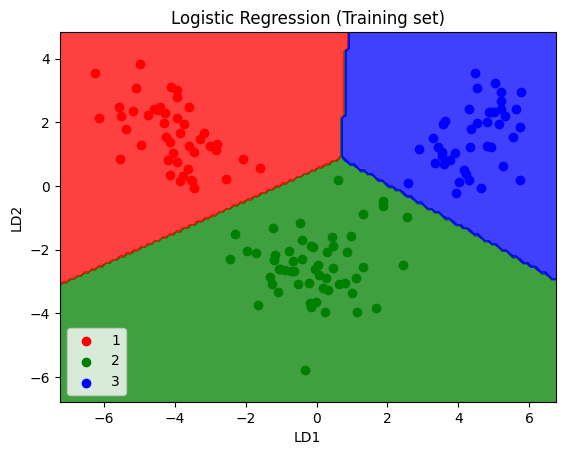

In [12]:
# the code in the visualization will almost never be used again besides CTRL+C CTRL+V
# tweaked with chatgpt in order to work

from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

# memory error: increase the step size
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))

# Use a single color for each class
colors = ['red', 'green', 'blue']

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(colors))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=[colors[i]], label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()

plt.show()

## Visualising the Test set results

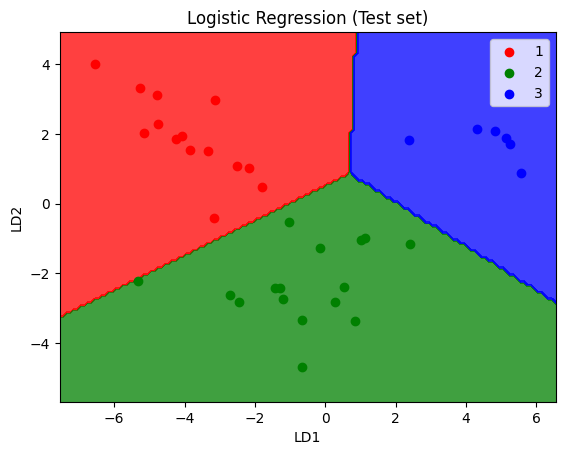

In [11]:
# the code in the visualization will almost never be used again besides CTRL+C CTRL+V
# tweaked with chatgpt in order to work

from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

# memory error: increase the step size
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))

# Use a single color for each class
colors = ['red', 'green', 'blue']

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(colors))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=[colors[i]], label=j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()